## I. About This Project

In this project, <b>I want to predict the Customer Data from Telco Customer Churn Dataset </b> (https://www.kaggle.com/blastchar/telco-customer-churn) using Artificial Neural Networks (ANN) Using TensorFlow and Keras.

The Dataset includes information about :
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

For Related Stack Documentations that I used in this project, you can access it through this link :
- <b>TensorFlow</b> : https://www.tensorflow.org/?hl=en
- <b>Keras</b> : https://keras.io/

## II. What is ANN?

Neural Networks, also knows as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another. 

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network. (source = https://www.ibm.com/cloud/learn/neural-networks)

<img src = "https://www.researchgate.net/profile/Facundo-Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png">

## III. Plan of Attack

In this project, There are 3 Major Steps in order to get the result using ANN, which are :
- <b>Data Preparation and Exploration</b>
- <b>Train and Predict the Data using ANN Model</b>
- <b>Evaluate The Prediction using some Metrics</b>

Lets get into it.

### Step 1 : Data Preparation and Exploration

In this step, We want to prepare the data to train. We do this because the data is still "dirty" and we should clean it so the data can fit into the model perfectly. Starting to import libraries until one hot encoding. everything just for one goal : <b>very very very clean data.</b>

#### Part 1 : Import Libraries

in this step, I use 3 libraries to modify the data into the clean data. There are :
- <b> Pandas </b> : for data manipulation and analysis
- <b> Numpy  </b> : for working with arrays
- <b> Matplotlib</b> : for visualizations
    
related documentations :
- https://pandas.pydata.org/
- https://numpy.org/
- https://matplotlib.org/

In [1]:
import pandas as pd #pro tip : use alias to make your code easier.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Part 2 : Understanding the dataset

If you already downloaded the dataset (link provided in the beginning of this document) and import some libraries, the next one is read and show your dataset. because the type of this file is CSV, I use <b>pd.read_csv()</b> to read the file and <b>head()</b> to just show first 5 rows of the dataset. In this dataset you'll se about the customer information starting from gender until the churn status.

In [2]:
df = pd.read_csv("datasets/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I realized that the <b> customerID</b> column is not necessary to analyze because it's <b>unique</b> and there is no reason why we should keep this column. use <b>df.drop()</b> to remove it.

In [3]:
df.drop('customerID', axis = 'columns', inplace = True)

Check the datatypes. In this output, I realized that the Data type of <b>TotalCharges</b> is object, we should change it to float or integer 

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

Change the Data Type with <b>pd.to_numeric()</b>

In [7]:
pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

Check the availability of the dataset, as you can see there are 10 rows that the TotalCharges is null. because of this, we can train the data since the data is stil messy. we should drop this rows in order to train the data

In [8]:
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
df.shape

(7043, 20)

from the previous df, the new df is more 10 fewer about 10 rows because of the deletion. Save the result in variable <b>df1</b>

In [11]:
df1 = df[df['TotalCharges'] != ' ']
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Change the TotalCharges to numeric.

In [13]:
df1.TotalCharges = pd.to_numeric(df1['TotalCharges'])

C:\anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

The next step is <b>Visualization</b> . as I mentioned before I used <b>matplotlib</b> to create the Viz. In this case, I use Histogram to see the distribution of the data. <b>The first one is I want to know the distribution of Tenure between the Churn customer and Non Churn Customer</b>. Dont forget to add legend so we can see the histogram more easier.

You can access the histogram documentation through this link : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [15]:
tenure_churn_no = df1[df1['Churn'] == 'No']['tenure']
tenure_churn_yes = df1[df1['Churn'] == 'Yes']['tenure']

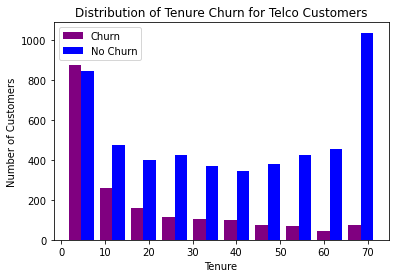

In [16]:
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['purple', 'blue'])
plt.title("Distribution of Tenure Churn for Telco Customers")
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.legend(['Churn', 'No Churn'])
plt.show()

From the histogram, we can conclude that <b>The bigger the tenure, the smaller the customer who will churn</b>

In [17]:
mc_churn_no = df1[df1['Churn'] == 'No']['MonthlyCharges']
mc_churn_yes = df1[df1['Churn'] == 'Yes']['MonthlyCharges']

For the other vizualization, same as before but we use <b>MonthlyCharges</b> column.

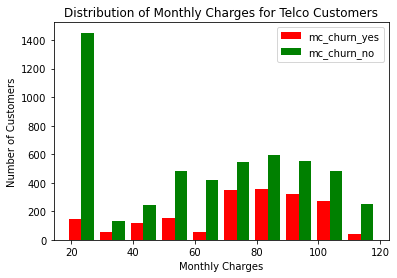

In [18]:
plt.hist([mc_churn_yes, mc_churn_no], color = ['red', 'green'])
plt.title("Distribution of Monthly Charges for Telco Customers")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.legend(['mc_churn_yes', 'mc_churn_no'])
plt.show()

From the histogram, we can conclude that <b>MonthlyCharges between 20 and 30, the customer most likely to churn</b>

#### Part 3: Data Cleaning and One Hot Encoding

Since the <b>Machine Learning and Deep Learning model don't have many capability in training the string values</b>, we should change many string and categorical values to integer

Show all columns that have object data type

In [19]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


from the <b>Dataset understanding</b>, I found that the definition of <b>No internet service</b> and <b>No phone service</b> have same meaning with <b>No</b> . so we replace those values with <b>df.replace()</b>

In [21]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Turn <b>Yes</b> and <b>No</b> values to 1 and 0 so we can train the data to the model more easier.

In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


I realize besides Yes and No, there are Categorical Values that we should turn it into 1 and 0. show them using loop

In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


First one is change gender. <b>Female</b> into 1 and <b>Male</b> into 0

In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

For the other categorical, we use <b> one hot encoding</b>. One hot encoding is <b> where the integer encoded variable is removed and a new binary variable is added for each unique integer value.</b> . in this case are <b>'InternetService','Contract','PaymentMethod'</b>

In [26]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

from one hot encoding, you can see that the columns change the values into code that contain from 1 and 0

In [27]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2485,1,0,0,0,14,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6965,1,1,1,0,61,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3666,1,0,1,1,50,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5838,0,0,1,1,53,1,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
6129,0,0,1,0,52,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


we already done with the categorical, the next one is we do the <b>Feature Scaling</b>. Feature scaling is <b>a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.</b> in this case are <b>'tenure','MonthlyCharges','TotalCharges'</b> columns.

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [29]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

### Step 2 : Train and Predict the Data using ANN Model

This is the main step of this project. We <b>train and predict</b> the data with the model. The first one is we should do the little preparation. we split the datasets into 4 parts, which are <b>X_train, y_train, X_test, and y_test</b>. use the test_size about 20% of the whole data and random_state = 5. 

In [30]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1,0,1,1,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1730,0,0,0,0,0.000000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4086,1,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
2259,1,0,0,0,0.098592,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [32]:
y_train

5664    1
101     0
2621    0
392     0
1327    1
       ..
3051    0
1730    1
4086    0
2259    0
2920    0
Name: Churn, Length: 5625, dtype: int64

then we initiate the <b>Neural Networks</b>. first we initiate the model use <b>Sequential</b> . and then we make the layers, in this case we make 3. We use activation <b>relu/rectifier</b> to solves the gradient vanishing problem and stops the inactive neurons. and <b>Sigmoid</b> in the output layer because its range is (0, 1) and it can represent the probability of binary class (we only have target in 1 and 0).

When you are doing multi-classification, it is more appropriate to use <b>Softmax</b> function.

Thw next step is compile the model. in this case I used <b>Adam</b> optimizer and <b>binary_crossentropy</b> loss since we want to predict the probability of binary class. and then fit it. set the epochs to 100

article related to activation functions in Neural Network : 
- https://www.v7labs.com/blog/neural-networks-activation-functions

In [33]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 910us/step - loss: 0.5624 - accuracy: 0.7327
Epoch 2/100
176/176 [==============================] - 0s 843us/step - loss: 0.4187 - accuracy: 0.7994
Epoch 3/100
176/176 [==============================] - 0s 875us/step - loss: 0.4148 - accuracy: 0.8049
Epoch 4/100
176/176 [==============================] - 0s 877us/step - loss: 0.4197 - accuracy: 0.8018
Epoch 5/100
176/176 [==============================] - 0s 857us/step - loss: 0.4190 - accuracy: 0.8035
Epoch 6/100
176/176 [==============================] - 0s 842us/step - loss: 0.4084 - accuracy: 0.8083
Epoch 7/100
176/176 [==============================] - 0s 873us/step - loss: 0.4190 - accuracy: 0.8002
Epoch 8/100
176/176 [==============================] - 0s 860us/step - loss: 0.4097 - accuracy: 0.8074
Epoch 9/100
176/176 [==============================] - 0s 842us/step - loss: 0.4053 - accuracy: 0.8090
Epoch 10/100
176/176 [==============================] - 0s 883us/step - l

We got the accuracy of <b>83%</b> which is quite good. the next step is evaluation.

### Step 3 : Evaluate The Prediction using some Metrics

we should evaluate our model so we can measure how effective our model is. to evaluate the model, we use sklearn.metrics as a main library. in this case we use :
- confusion matrix
- classification report

related documents :
- https://scikit-learn.org/stable/modules/model_evaluation.html

In [34]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7584


[0.5115149021148682, 0.7583510875701904]

In [35]:
yp = model.predict(X_test)
yp[:5]

array([[0.19258854],
       [0.4358921 ],
       [0.00180805],
       [0.7014479 ],
       [0.34015405]], dtype=float32)

In [36]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:5]

[0, 0, 0, 1, 0]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       999
           1       0.62      0.44      0.52       408

    accuracy                           0.76      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.74      0.76      0.75      1407



Text(69.0, 0.5, 'Truth')

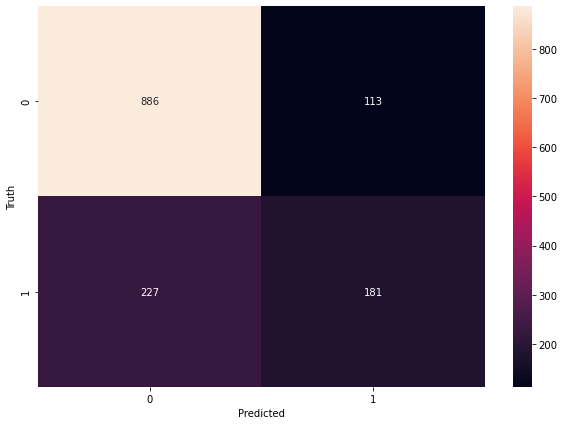

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

and then we use some metrics to measure the model effectivity. which are :
- <b>Accuracy</b> : the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data.
- <b>Recall</b> : the number of relevant documents retrieved by a search divided by the total number of existing relevant documents
- <b>Precision</b> : the number of relevant documents retrieved by a search divided by the total number of documents retrieved by that search.

In [45]:
#accuracy
(886+181)/(886+181+113+227)

0.7583511016346838

In [46]:
# Precision for 0 class. i.e. Precision for customers who did not churn
886/(887+227)

0.7953321364452424

In [47]:
# Precision for 1 class. i.e. Precision for customers who actually churned
181/(181+113)

0.6156462585034014

In [42]:
# Recall for 0 class

886/(886+113)

0.8798798798798799

In [48]:
# Recall for 1 class

181/(181 + 113)

0.6156462585034014

## The end of the project.

Apparently this is the end of the project. this project is aim to predict multiple features using Deep Learning and I hope I can be more expert in the future in Deep Learning & Machine Learning area. See ya in my other projects!